<a href="https://colab.research.google.com/github/matyi101/MANB1153/blob/main/PMA1_Single_Home_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **POST MODULE ASSESSMENT SEMESTER 1 (SESSION 2021/2022)**
## **MANB 1153 - DATA MINING AND BUSINESS ANALYTICS**
### **MOHD NAZRI BIN NAWI (MAN201071)**

# **PART 1**

## **Question No 1**

***a)	Define scope(s) of your project. You may need to choose which dataset that  interest you. [2.5 marks]***

The scope of this project is to mining data single family home value dataset located in Denver base on zipcode. The data is obtained from published data in Kaggle published by Zillow.com. The goal of this project is to develop a model that predicts the Zillow Home Valuation Index (ZHVI) based on features collected by Zillow.

***b)	Based on part (a), define problem statement of your project. [2.5 marks]***

The goal of this data mining project is to understand the relationship between houe features and how these variable are use to predict house price.


## **Question 2**

Based on Question 1, please answer the following question:

**a)	Illustrate a data mining model that are suitable for your project needs. (Use CRISP DM) [2.5 marks]**

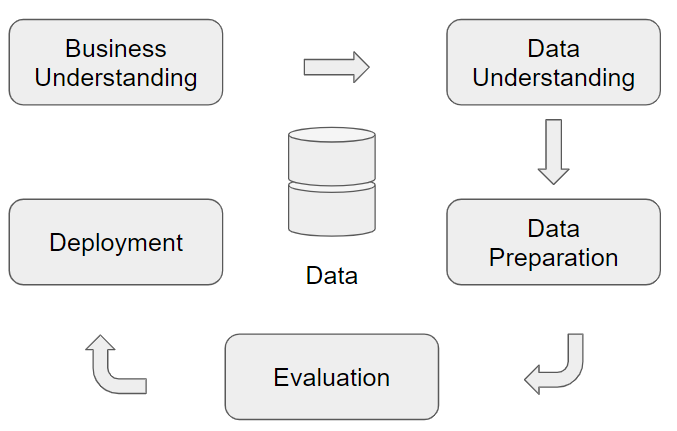




**b)	Explain each component of the model. [2.5 marks]**

i.	Business understanding – Understand the objective and goal. In this project, our objective is to understand the relationship between houe features and how these variable are use to predict house price.

ii.	Data understanding – Understand what kind of data we have, need and data quality. From the obtained data, we have to make sure that data collected is suitable to be used in this project

iii.	Data preparation – Organize the data for data mining model. Data prepared need to be in suitable format which in this case is .csv type, minimal error which is can be cleaned, deleted or imputate.

iv.	Modeling – Determine the algorithm and techniques. We will use classification technique such as KMean, the logistic and linear regression will be applied to the data.

v.	Evaluation – Determine the best model based on the algorithm. The result will be compare and evaluate and then best model will be determined.

vi.	Deployment – How can the result be translated into business application. From evaluation result, the best algorithm will be used to roll out the deployment.


# **PART 2**

**Question 3**

a)	Develop Exploratory Data Analysis (EDA) model(s) using Python. You are      required to submit your complete Python code. [20 Marks]


b)	Analyze the findings from above output. [10 Marks]


## 1. Loading libraries and packages.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib  inline 

## 2. Load data

In [ ]:
# Data from kaggle is downloaded and then uploaded to github. URL linked is used to read data from Github.
# Data URL link https://www.kaggle.com/kylet550/single-family-home-values-by-city (Source: Zillow Home Value Index (ZHVI)).
url = 'https://raw.githubusercontent.com/matyi101/dataset/main/single_family_home_values.csv'
df = pd.read_csv(url)
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


## 3. Data Preparation and Cleaning 

In [ ]:
# Checking shape of data

df.shape

(15000, 18)

In [ ]:
# Check for missing value from dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [ ]:
# From data above, there are missing values in latitute, longitude, yearBuilt, priorSalesDate and priorSateDate. 
# These missing value (NA) will be filled with mean value.

df=df.fillna(df.mean())
df.dropna(inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11173 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11173 non-null  int64  
 1   address          11173 non-null  object 
 2   city             11173 non-null  object 
 3   state            11173 non-null  object 
 4   zipcode          11173 non-null  int64  
 5   latitude         11173 non-null  float64
 6   longitude        11173 non-null  float64
 7   bedrooms         11173 non-null  int64  
 8   bathrooms        11173 non-null  float64
 9   rooms            11173 non-null  int64  
 10  squareFootage    11173 non-null  int64  
 11  lotSize          11173 non-null  int64  
 12  yearBuilt        11173 non-null  float64
 13  lastSaleDate     11173 non-null  object 
 14  lastSaleAmount   11173 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11173 non-null  float64
 17  estimated_va

## 4. Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.117300e+04,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,1.117300e+04,1.117300e+04,1.117300e+04
mean,4.419642e+07,80205.002954,39.741310,-104.963570,2.682359,2.209031,6.116441,1481.227244,5685.553209,1929.062160,4.229467e+05,2.624790e+05,6.310055e+05
std,5.665783e+07,9.181246,0.023230,0.039600,0.878987,1.159730,1.933034,801.192486,2506.781712,29.796315,5.786213e+05,3.387000e+05,5.002564e+05
min,1.433670e+05,80022.000000,39.614539,-105.108407,0.000000,0.000000,0.000000,350.000000,278.000000,1874.000000,5.000000e+02,0.000000e+00,1.477670e+05
25%,8.653576e+06,80205.000000,39.728112,-104.978430,2.000000,1.000000,5.000000,979.000000,4460.000000,1906.000000,2.239000e+05,1.150000e+05,4.015370e+05
50%,2.170586e+07,80206.000000,39.748887,-104.957680,3.000000,2.000000,6.000000,1240.000000,5950.000000,1925.000000,3.450000e+05,2.140000e+05,5.157780e+05
75%,4.622806e+07,80207.000000,39.758784,-104.936418,3.000000,3.000000,7.000000,1700.000000,6250.000000,1949.000000,4.850000e+05,3.321070e+05,6.785300e+05
max,2.527298e+08,80209.000000,39.849160,-104.893468,15.000000,12.000000,39.000000,10907.000000,97125.000000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [ ]:
df.lastSaleDate = pd.to_datetime(df.lastSaleDate)
df.priorSaleDate = pd.to_datetime(df.priorSaleDate)
print(np.around(df[['lastSaleDate', 'priorSaleDate']].describe(datetime_is_numeric=True).transpose(), decimals=2).to_string())

               count                          mean        min        25%        50%        75%        max
lastSaleDate   11173 2011-12-14 07:48:29.191812864 1998-01-20 2008-11-18 2013-03-29 2015-07-27 2017-07-21
priorSaleDate  11173 2006-09-21 03:25:03.087803648 1967-05-10 2003-06-09 2007-06-26 2011-03-29 2017-07-11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


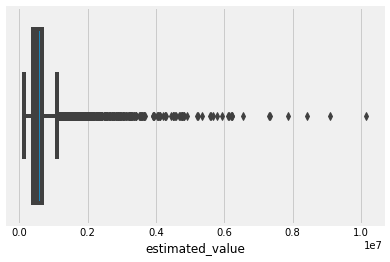

In [ ]:
# Check for outliers using boxplot for extimated value
sns.boxplot(df.estimated_value)

In [ ]:
# Get rid of outliers. Slicing out estimated value that is above USD 800,000.00 from dataframe
df = df[df.estimated_value<=800000]
df.shape


(9541, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


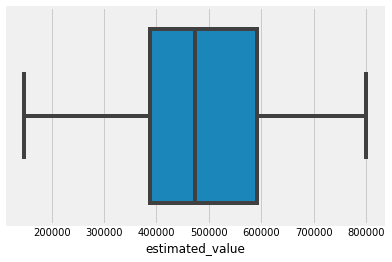

In [ ]:
sns.boxplot(df.estimated_value)

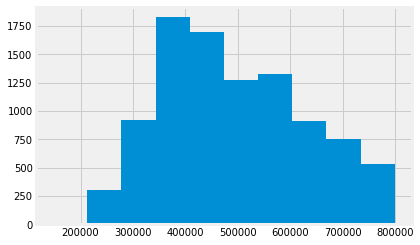

In [ ]:
df.estimated_value.hist()

In [ ]:
#filter out noise, slice df
df[(df.estimated_value<=1000000)  &  (df.yearBuilt>2013) &  (df.zipcode==80209)] 

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
13276,39512040,764 S York St,Denver,CO,80209,39.702607,-104.960243,3,4.0,7,2567,6250,2016.0,2012-07-23,420000,2010-11-29,385000.0,770622
13316,11586398,450 S Vine St,Denver,CO,80209,39.708351,-104.962546,3,5.0,7,2570,4680,2016.0,2015-02-11,571000,2007-01-03,399000.0,682810
13428,11586742,636 S Williams St,Denver,CO,80209,39.704969,-104.966025,3,5.0,6,2578,4680,2016.0,2015-07-22,637600,2007-02-02,481900.0,745777
13431,184305844,456 S High St,Denver,CO,80209,39.708197,-104.964857,3,5.0,10,3346,6240,2016.0,2016-01-11,725000,1993-07-15,124000.0,751361
13766,7652681,408 S Franklin St,Denver,CO,80209,39.709074,-104.968369,3,5.0,8,3367,5060,2015.0,2014-04-21,513486,2007-08-22,435000.0,709102
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,2003-06-19,357500.0,753935


In [ ]:
df.describe() 

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,9.541000e+03,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9.541000e+03,9.541000e+03,9541.000000
mean,4.105231e+07,80204.672990,39.744091,-104.965074,2.543025,1.895137,5.671418,1248.155958,5428.923488,1927.122473,3.293560e+05,2.028308e+05,493619.475631
std,5.462284e+07,9.762654,0.022745,0.042052,0.751769,0.763786,1.375394,425.426176,1700.874076,27.265469,5.043234e+05,1.572737e+05,135785.916292
min,1.433670e+05,80022.000000,39.614539,-105.108407,0.000000,0.000000,0.000000,350.000000,278.000000,1874.000000,5.000000e+02,0.000000e+00,147767.000000
25%,7.435623e+06,80205.000000,39.731155,-104.981756,2.000000,1.000000,5.000000,947.000000,4430.000000,1906.000000,2.040000e+05,1.050000e+05,387179.000000
50%,1.959154e+07,80205.000000,39.751776,-104.958432,2.000000,2.000000,5.000000,1142.000000,5940.000000,1925.000000,3.135000e+05,1.926000e+05,474397.000000
75%,4.322824e+07,80207.000000,39.759879,-104.933618,3.000000,2.000000,6.000000,1478.000000,6250.000000,1949.000000,4.190000e+05,2.900000e+05,591917.000000
max,2.527298e+08,80209.000000,39.849160,-104.893468,9.000000,11.000000,21.000000,4695.000000,22400.000000,2016.000000,4.560000e+07,4.475900e+06,799746.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 14994
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               9541 non-null   int64         
 1   address          9541 non-null   object        
 2   city             9541 non-null   object        
 3   state            9541 non-null   object        
 4   zipcode          9541 non-null   int64         
 5   latitude         9541 non-null   float64       
 6   longitude        9541 non-null   float64       
 7   bedrooms         9541 non-null   int64         
 8   bathrooms        9541 non-null   float64       
 9   rooms            9541 non-null   int64         
 10  squareFootage    9541 non-null   int64         
 11  lotSize          9541 non-null   int64         
 12  yearBuilt        9541 non-null   float64       
 13  lastSaleDate     9541 non-null   datetime64[ns]
 14  lastSaleAmount   9541 non-null   int64 

In [ ]:
df= df[df.lastSaleAmount<=800000]

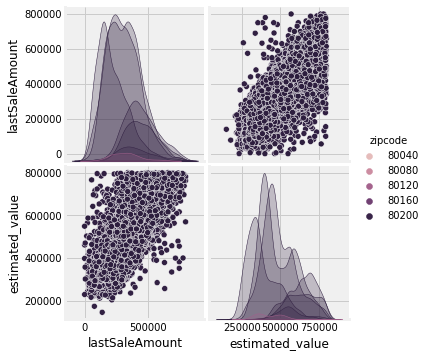

In [ ]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode')

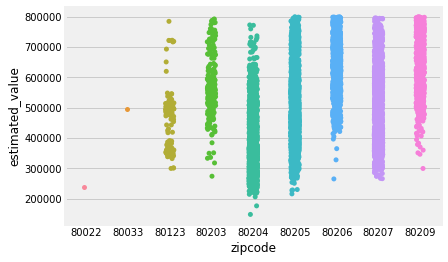

In [ ]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

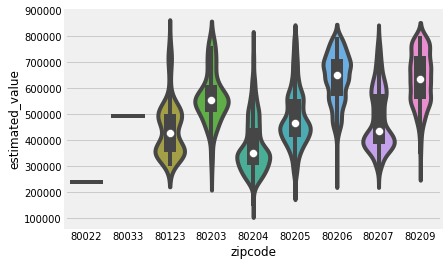

In [ ]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)

In [ ]:
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate)
df['lastSaleDate'] = pd.to_datetime(df.lastSaleDate)

df['weekday_lastSaleDate'] = df.lastSaleDate.dt.weekday
df['year_lastSaleDate'] = df.lastSaleDate.dt.year

df['weekday_priorSaleDate'] = df.priorSaleDate.dt.weekday
df['year_priorSaleDate'] = df.priorSaleDate.dt.year

df['year_between_last_sales']=df.year_lastSaleDate-df.year_priorSaleDate


In [ ]:
df.corr().loc[ 'estimated_value' , : ].sort_values(ascending=False)

estimated_value            1.000000
lastSaleAmount             0.738642
squareFootage              0.613362
bathrooms                  0.586416
priorSaleAmount            0.539670
rooms                      0.525103
bedrooms                   0.280232
longitude                  0.239454
id                         0.123097
zipcode                    0.098229
year_between_last_sales    0.062336
year_lastSaleDate          0.034776
weekday_lastSaleDate      -0.001775
weekday_priorSaleDate     -0.010604
year_priorSaleDate        -0.037243
lotSize                   -0.130200
latitude                  -0.162350
yearBuilt                 -0.273512
Name: estimated_value, dtype: float64

## 5.0 Data Mining

In [ ]:
# Checking median value based on zipcode

df2= df.groupby('zipcode').estimated_value.median().reset_index()
df2.columns=['zipcode', 'median_value']
df2

,zipcode,median_value
0,80022,239753.0
1,80033,494073.0
2,80123,427234.5
3,80203,555957.0
4,80204,351899.0
5,80205,464200.5
6,80206,649269.0
7,80207,436920.0
8,80209,637302.0


In [ ]:
# Full details 

df3 = pd.merge(df, df2, on='zipcode', how='left')
df3.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales,median_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,3,2009,3,2004,5,239753.0
1,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,1,2008,4,2008,0,494073.0
2,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,2,2012,3,2011,1,427234.5
3,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,1,2006,0,2005,1,427234.5
4,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,0,2014,4,2006,8,427234.5


In [ ]:
X = df.drop('estimated_value', axis=1)
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt', 'priorSaleAmount']]
X.fillna(0, inplace=True)
X.head(2)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
3,4,3.0,0,2400,11500,1956.0,0.0


### 5.1 Cluster Analysis 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score 

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans

KMeans(n_clusters=5, random_state=0)

In [ ]:
labels= kmeans.labels_
labels

array([0, 2, 2, ..., 0, 1, 1], dtype=int32)

In [ ]:
len(kmeans.labels_), X.shape

(9505, (9505, 7))

In [ ]:
kmeans.cluster_centers_[0]

array([2.50149076e+00, 1.73732856e+00, 5.41293977e+00, 1.15814371e+03,
       5.54791175e+03, 1.93033379e+03, 1.63199441e+05])

In [ ]:
# Determine cluster and features
kmeans.cluster_centers_.shape

(5, 7)

In [ ]:
X['cluster'] = labels

In [ ]:
X.groupby('cluster').mean()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,2.501491,1.737329,5.412940,1158.143709,5547.911747,1930.333786,1.631994e+05
1,2.682305,2.372016,6.444444,1506.700412,5234.413169,1920.804115,4.323496e+05
2,2.468038,1.625168,5.338400,1129.713903,5653.523469,1930.329012,2.912208e+04
3,2.857143,2.285714,6.571429,1823.142857,7136.285714,1928.142857,3.092914e+06
4,2.592496,2.094354,5.913076,1335.432764,5178.633730,1923.336924,2.836063e+05


In [ ]:
X= X.drop('cluster', axis=1)

In [ ]:
# k means
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['bedrooms', 'priorSaleAmount']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})



<function matplotlib.pyplot.show>

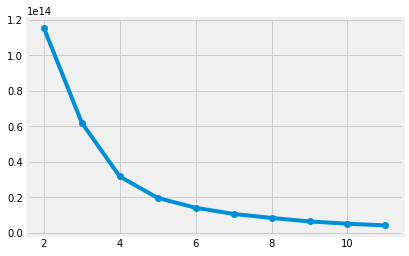

In [ ]:
# Finding optimum number of cluster (k) using Elbow Method
plt.figure()
plt.plot(clusters_range, inertias, marker ='o')
plt.show

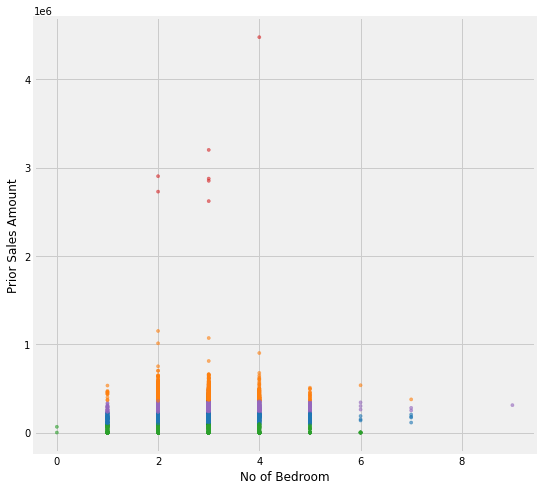

In [ ]:
# define and map colors
plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
plt.scatter(df.bedrooms, df.priorSaleAmount, c=df.c, alpha = 0.6, s=10)
plt.xlabel("No of Bedroom")
plt.ylabel("Prior Sales Amount")
plt.show()

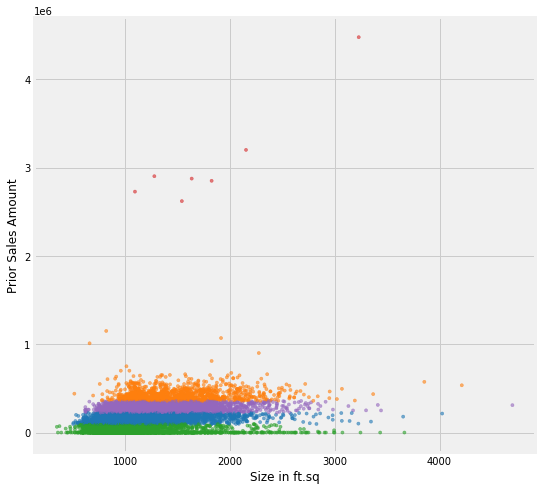

In [ ]:
# k means
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster2'] = kmeans.fit_predict(df[['squareFootage', 'priorSaleAmount']])

# get centroids
centroids = kmeans.cluster_centers_
cent_x = [i[0] for i in centroids] 
cent_y = [i[1] for i in centroids]

## add to df
df['cent_x'] = df.cluster2.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cent_y'] = df.cluster2.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
df['c'] = df.cluster2.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
plt.scatter(df.squareFootage, df.priorSaleAmount, c=df.c, alpha = 0.6, s=10)
plt.xlabel("Size in ft.sq")
plt.ylabel("Prior Sales Amount")
plt.show()

### 7.0 Classification And Regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
X.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0
5,3,5.0,7,2051,6045,1996.0,339000.0
6,4,4.0,8,2051,6315,1997.0,345000.0


In [ ]:
y=df.estimated_value 


In [ ]:
lg = LinearRegression()
lg.fit(X,y) #training 
lg.score(X,y) 

0.6203217417470884

In [ ]:
X_train, X_test,  y_train, y_test= train_test_split(X,y)

In [ ]:
X_train.shape, y_train.shape 

((7128, 7), (7128,))

In [ ]:
lg = LinearRegression()
lg.fit(X_train,y_train) # training , fit 
lg.score(X_test,y_test) # evaluate , score, R2 

0.638941775465157

In [ ]:
df['estimated_value_bins']=df.estimated_value.apply(lambda x: 'high' if x> 500000 else 'low')
df.estimated_value_bins.value_counts()

low     5266
high    4239
Name: estimated_value_bins, dtype: int64

In [ ]:
y2= df.estimated_value_bins
log = LogisticRegression() 

In [ ]:
X_train, X_test,  y2_train, y2_test= train_test_split(X,y2)
log.fit(X_train, y2_train)
log.score(X_test, y2_test)

0.8245687841817417

In [ ]:
y_pred = log.predict(X_test)
np.array(y2_test)


array(['low', 'low', 'high', ..., 'low', 'low', 'low'], dtype=object)

In [ ]:
confusion_matrix(y2_test,y_pred )

array([[ 851,  226],
       [ 191, 1109]])

In [ ]:
svr= SVR() 
svr.fit(X_train, y_train)
svr.score(X_test, y_test) 
 

-0.01794014880155026

In [ ]:
svc= SVC() 
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test) 

0.7930164072360117

In [ ]:
y2_pred=svc.predict(X_test)
confusion_matrix(y2_test, y2_pred)

array([[ 714,  363],
       [ 129, 1171]])

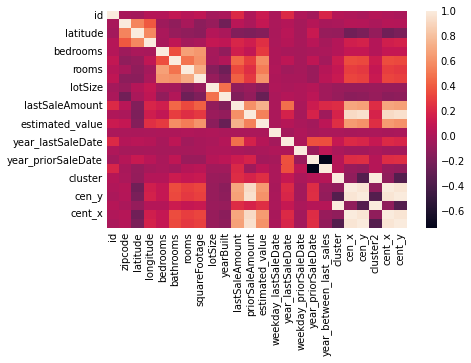

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.cov()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales,cluster,cen_x,cen_y,cluster2,cent_x,cent_y
id,2.959910e+15,-8.705458e+06,-47752.131531,93236.832727,1.276050e+06,3.836301e+06,3.358841e+06,1.883294e+09,-2.699986e+09,-1.634199e+07,1.722076e+12,9.258050e+10,9.080904e+11,-245987.215205,5.190845e+07,994710.772587,-1.330764e+07,6.521609e+07,3.384991e+06,59731.183915,-3.085271e+10,3.384991e+06,59731.183915,-3.085271e+10
zipcode,-8.705458e+06,9.565335e+01,0.123173,0.160960,-4.371180e-01,-8.253896e-01,-2.533268e-01,-5.154014e+02,-1.342655e+03,-6.142796e+01,7.154451e+04,-9.349284e+03,1.302661e+05,-0.054843,1.313042e+00,-0.302363,2.216033e+00,-9.029912e-01,-8.560365e-02,0.026003,4.247553e+04,-8.560365e-02,0.026003,4.247553e+04
latitude,-4.775213e+04,1.231727e-01,0.000518,0.000545,-1.288038e-04,-1.424524e-03,-3.479564e-03,-1.249238e+00,1.245497e+00,-8.003176e-03,-5.676448e+02,-6.583429e+02,-5.010186e+02,-0.000346,5.428446e-03,-0.000768,1.687986e-02,-1.145142e-02,-3.331729e-03,-0.000398,-6.047563e+02,-3.331729e-03,-0.000398,-6.047563e+02
longitude,9.323683e+04,1.609596e-01,0.000545,0.001772,-5.451144e-04,2.561100e-03,-1.877560e-03,-4.744244e-02,6.960272e+00,8.662413e-02,1.215964e+03,9.622585e+02,1.366922e+03,-0.000315,7.735238e-03,-0.001025,1.346106e-02,-5.725821e-03,1.977003e-03,0.000516,1.076590e+03,1.977003e-03,0.000516,1.076590e+03
bedrooms,1.276050e+06,-4.371180e-01,-0.000129,-0.000545,5.644850e-01,2.058616e-01,6.814757e-01,2.009550e+02,-3.079398e+01,-2.151574e+00,1.732094e+04,1.008508e+04,2.854880e+04,0.005829,-6.496338e-02,-0.028208,-4.857790e-02,-1.638548e-02,3.955327e-02,0.005791,1.009101e+04,3.955327e-02,0.005791,1.009101e+04
bathrooms,3.836301e+06,-8.253896e-01,-0.001425,0.002561,2.058616e-01,5.801356e-01,5.101489e-01,1.965318e+02,-3.940341e+01,4.936142e-01,5.066256e+04,3.523429e+04,6.056392e+04,0.000914,2.403668e-01,-0.023562,3.866227e-01,-1.462558e-01,1.627979e-01,0.020219,3.516347e+04,1.627979e-01,0.020219,3.516347e+04
rooms,3.358841e+06,-2.533268e-01,-0.003480,-0.001878,6.814757e-01,5.101489e-01,1.885349e+00,4.133368e+02,-3.546689e+02,-9.167129e+00,6.932989e+04,5.076449e+04,9.776502e+04,0.036733,-2.831779e-01,-0.053340,-5.984990e-01,3.153211e-01,2.206253e-01,0.030878,5.220564e+04,2.206253e-01,0.030878,5.220564e+04
squareFootage,1.883294e+09,-5.154014e+02,-1.249238,-0.047442,2.009550e+02,1.965318e+02,4.133368e+02,1.799083e+05,-5.966342e+04,-2.055101e+03,2.666075e+07,1.841948e+07,3.527654e+07,2.754246,-3.597795e+01,-10.837442,-1.811564e+02,1.451785e+02,7.985449e+01,10.497741,1.779648e+07,7.985449e+01,10.497741,1.779648e+07
lotSize,-2.699986e+09,-1.342655e+03,1.245497,6.960272,-3.079398e+01,-3.940341e+01,-3.546689e+02,-5.966342e+04,2.870948e+06,2.230244e+04,-2.625523e+07,-1.842423e+07,-2.991348e+07,22.914210,-1.524322e+01,19.921328,4.272451e+02,-4.424883e+02,-1.998695e+02,-10.859731,-1.958678e+07,-1.998695e+02,-10.859731,-1.958678e+07
yearBuilt,-1.634199e+07,-6.142796e+01,-0.008003,0.086624,-2.151574e+00,4.936142e-01,-9.167129e+00,-2.055101e+03,2.230244e+04,7.420160e+02,-6.920147e+05,-4.221508e+05,-1.010245e+06,-0.122815,3.877373e+00,0.451267,1.072156e+01,-6.844190e+00,-3.591679e+00,-0.273313,-4.518357e+05,-3.591679e+00,-0.273313,-4.518357e+05


In [ ]:
y=df.estimated_value
X.columns

Index(['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'priorSaleAmount'],
      dtype='object')

====
bedrooms
mean: 2.542766964755392
std: 0.751322153127849


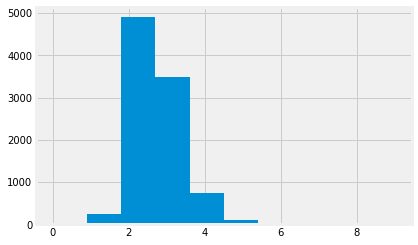

====
bathrooms
mean: 1.8935823250920567
std: 0.761666315910045


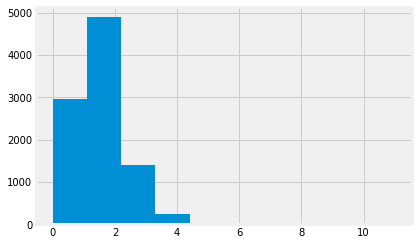

====
rooms
mean: 5.669752761704366
std: 1.3730800001319907


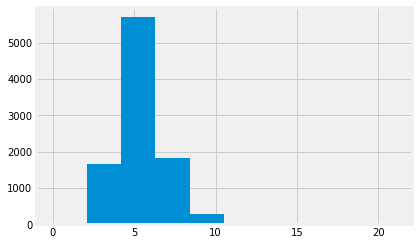

====
squareFootage
mean: 1246.7093108890058
std: 424.15602125738934


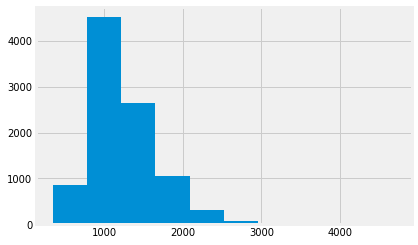

====
lotSize
mean: 5429.276801683324
std: 1694.3870776450287


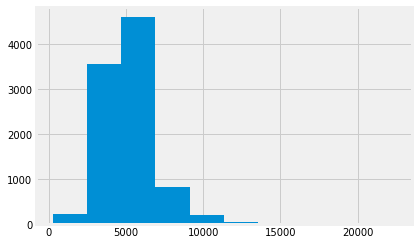

====
yearBuilt
mean: 1927.131248518444
std: 27.23996973788474


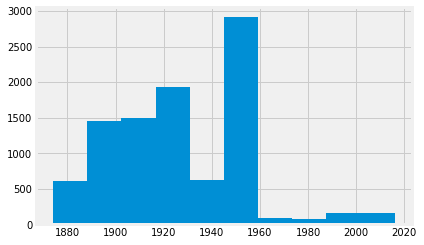

====
priorSaleAmount
mean: 202308.29733195703
std: 156377.08328884476


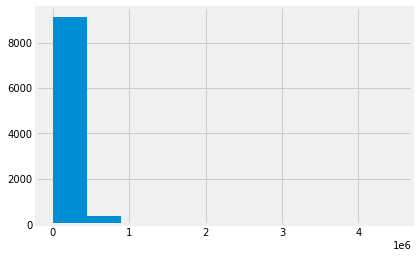

In [ ]:
for i in X.columns:
  print  ('====')
  print (i)
  X.loc[:, i].hist()
  print ('mean:' ,  X.loc[:, i].mean())
  print ('std:' ,  X.loc[:, i].std())
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')